In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras import backend as k
from keras.utils import np_utils

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from sklearn.svm import SVC

np.random.seed(42)
plt.rcParams['figure.figsize'] = (7, 4.5)

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [3]:
print("Shape of the Training Datasets: {}".format(x_train.shape))
print("Shape of the Testing Datasets: {}".format(x_test.shape))

Shape of the Training Datasets: (60000, 28, 28)
Shape of the Testing Datasets: (10000, 28, 28)


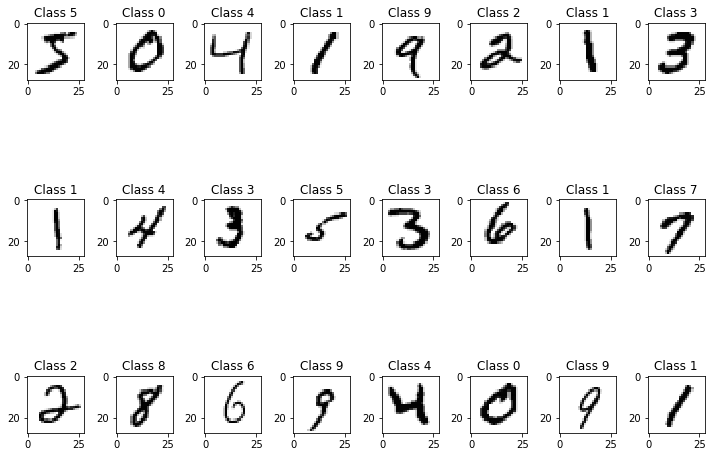

In [4]:
plt.figure(figsize = (10, 8))
for i in range(24):
    plt.subplot(3, 8, i+1)
    plt.imshow(255 - x_train[i], cmap = plt.cm.gray, interpolation='none')
    plt.title("Class {}".format(y_train[i]))
plt.tight_layout()

In [5]:
for x in x_train[i]:
    for i in x:
        print(str(i).rjust(4), end = '')
    print()

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 121 254 136   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13 230 253 248  99   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   4 118 253 253 225  42   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  61 253 253 253  74   0   0   0

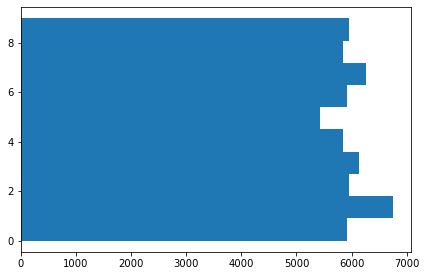

In [6]:
plt.hist(y_train, bins = 10, orientation='horizontal')
plt.show()

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255.0
x_test = x_test/255.0


In [8]:
n_classes = len(np.unique(y_train))
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)

In [9]:
x_train_flat = x_train.reshape(-1, 784)
x_test_flat = x_test.reshape(-1, 784)

In [10]:
img_rows, img_cols = 28, 28

In [11]:
if k.image_data_format() == 'channel_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
    
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols)

In [12]:
x_test.shape

(10000, 28, 28, 1)

In [13]:
model = Sequential()
model.add(Dense(128, activation = 'relu', input_shape = (784,)))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(x_train_flat, y_train, batch_size = 128, epochs = 10, verbose = 1, validation_data = (x_test_flat, y_test))

Epoch 1/10
469/469 [==============================] - 1s 3ms/step - loss: 0.8179 - accuracy: 0.7495 - val_loss: 0.2111 - val_accuracy: 0.9391
Epoch 2/10
469/469 [==============================] - 1s 1ms/step - loss: 0.2758 - accuracy: 0.9189 - val_loss: 0.1568 - val_accuracy: 0.9537
Epoch 3/10
469/469 [==============================] - 1s 1ms/step - loss: 0.2197 - accuracy: 0.9346 - val_loss: 0.1300 - val_accuracy: 0.9602
Epoch 4/10
469/469 [==============================] - 1s 1ms/step - loss: 0.1926 - accuracy: 0.9435 - val_loss: 0.1151 - val_accuracy: 0.9654
Epoch 5/10
469/469 [==============================] - 1s 1ms/step - loss: 0.1682 - accuracy: 0.9507 - val_loss: 0.1050 - val_accuracy: 0.9677
Epoch 6/10
469/469 [==============================] - 1s 1ms/step - loss: 0.1568 - accuracy: 0.9537 - val_loss: 0.0987 - val_accuracy: 0.9693
Epoch 7/10
469/469 [==============================] - 1s 1ms/step - loss: 0.1433 - accuracy: 0.9568 - val_loss: 0.0929 - val_accuracy: 0.9723
Epoch 

In [15]:
model = Sequential()
model.add(Dense(128, activation = 'relu', input_shape = (784, )))
model.add(Dropout(0.5))
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(x_train_flat, y_train, batch_size =128, verbose = 1, epochs = 10, validation_data = (x_test_flat, y_test))

Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 1.0190 - accuracy: 0.6638 - val_loss: 0.2065 - val_accuracy: 0.9388
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3271 - accuracy: 0.9058 - val_loss: 0.1525 - val_accuracy: 0.9534
Epoch 3/10
469/469 [==============================] - 1s 1ms/step - loss: 0.2598 - accuracy: 0.9249 - val_loss: 0.1348 - val_accuracy: 0.9596
Epoch 4/10
469/469 [==============================] - 1s 1ms/step - loss: 0.2302 - accuracy: 0.9327 - val_loss: 0.1199 - val_accuracy: 0.9630
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2093 - accuracy: 0.9402 - val_loss: 0.1103 - val_accuracy: 0.9656
Epoch 6/10
469/469 [==============================] - 1s 1ms/step - loss: 0.1853 - accuracy: 0.9449 - val_loss: 0.1019 - val_accuracy: 0.9699
Epoch 7/10
469/469 [==============================] - 1s 1ms/step - loss: 0.1715 - accuracy: 0.9499 - val_loss: 0.1028 - val_accuracy: 0.9715
Epoch 

In [17]:
cnn_model = Sequential()
cnn_model.add(Convolution2D(8, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Convolution2D(16, (3, 3), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.5))

cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation = 'relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(10, activation = 'softmax'))

cnn_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)               

In [18]:
cnn_model.fit(x_train, y_train, batch_size = 128,epochs = 10, verbose = 1,  validation_data = (x_test, y_test))

Epoch 1/10
469/469 [==============================] - 6s 12ms/step - loss: 1.2946 - accuracy: 0.5615 - val_loss: 0.1552 - val_accuracy: 0.9564
Epoch 2/10
469/469 [==============================] - 6s 12ms/step - loss: 0.3527 - accuracy: 0.8924 - val_loss: 0.0959 - val_accuracy: 0.9718
Epoch 3/10
469/469 [==============================] - 6s 12ms/step - loss: 0.2642 - accuracy: 0.9196 - val_loss: 0.0784 - val_accuracy: 0.9755
Epoch 4/10
469/469 [==============================] - 6s 12ms/step - loss: 0.2203 - accuracy: 0.9331 - val_loss: 0.0666 - val_accuracy: 0.9785
Epoch 5/10
469/469 [==============================] - 6s 12ms/step - loss: 0.2038 - accuracy: 0.9397 - val_loss: 0.0574 - val_accuracy: 0.9828
Epoch 6/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1882 - accuracy: 0.9436 - val_loss: 0.0548 - val_accuracy: 0.9820
Epoch 7/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1801 - accuracy: 0.9477 - val_loss: 0.0506 - val_accuracy: 0.9836